<a href="https://colab.research.google.com/github/Diacod-I/Scratch-ML/blob/main/MLScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monovariate Linear Regression from scratch

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def lmean(xarr):
  return sum(xarr)/len(xarr)

def stanerr(yarr,ypred):
    ydiff = list(map(lambda a:round(a,5),[(i-j)**2 for i,j in zip(yarr,ypred)]))
    err = (sum(ydiff)/(len(ydiff)-2))**(1/2)
    print("Standard Error of Estimates: {:.4f}".format(err),end='\n\n')

def rsquare(yarr,ypred):

    rss = sum([(i-j)**2 for i,j in zip(yarr,ypred)])
    ssr = sum([(i-lmean(yarr))**2 for i in yarr])
    tss = rss+ssr
    rsq = (1-(rss/tss))*100
    print("R^2: {:.4f} %".format(rsq),end='\n\n')

In [28]:
def LinearReg(xarr,yarr,err_est='standard'):
    xmean = lmean(xarr)
    ymean = lmean(yarr)

    xvar = list(map(lambda a: round(a,4),[(i-xmean) for i in xarr]))
    yvar = list(map(lambda a: round(a,4),[(i-ymean) for i in yarr]))

    xsvar = list(map(lambda a: round(a,4),[i**2 for i in xvar]))
    varprod = list(map(lambda a: round(a,4),[i*j for i,j in zip(xvar,yvar)]))

    covar = sum(varprod)/len(varprod)
    b1 = sum(varprod)/sum(xsvar)
    b0 = ymean - (b1*xmean)

    ypred = [((b1*i)+b0) for i in xarr]

    print("X values provided:",xarr,end='\n')
    print("Y values provided:",yarr,end='\n\n')

    print("Mean of X:",xmean,end='\n')
    print("Mean of Y:",ymean,end='\n\n')

    print("Variance of X (X-Xmean):",xvar,end='\n')
    print("Variance of Y (Y-Ymean):",yvar,end='\n\n')

    print("Squared X Variance",xsvar,end='\n')
    print("(X-Xmean)(Y-Ymean):",varprod,end='\n\n')

    print("Covariance:{:.4f}".format(covar),end='\n')
    print("b1 = Σ((X-Xmean)(Y-Ymean))/Σ((X-Xmean)^2) : {:.4f}".format(b1),end='\n')
    print("b0 = Ymean - (b1)(Xmean) : {:.4f}".format(b0),end='\n\n')

    print("Predictions of Y based on the Linear Equation:",list(map(lambda a:float("{:.3f}".format(a)),ypred)),end='\n\n')

    if err_est=='standard':
      stanerr(yarr,ypred)

    elif err_est=='rsquare':
      rsquare(yarr,ypred)
    else:
      raise Exception('Invalid Argument: err_est\n\nOnly arguments possible are as follows:\n\n\'standard(default)\', \'rsquare\'\n')

    plt.scatter(xarr,yarr)
    plt.plot(xarr,ypred,c='k')

In [5]:
xarr = list(np.random.randint(11, size=20))
yarr = list(np.random.randint(11, size=20))

X values provided: [10, 5, 3, 0, 4, 0, 6, 7, 3, 4, 0, 6, 7, 2, 1, 8, 8, 3, 8, 3]
Y values provided: [9, 6, 1, 6, 5, 5, 8, 8, 2, 6, 7, 6, 5, 10, 1, 1, 5, 3, 5, 9]

Mean of X: 4.4
Mean of Y: 5.4

Variance of X (X-Xmean): [5.6, 0.6, -1.4, -4.4, -0.4, -4.4, 1.6, 2.6, -1.4, -0.4, -4.4, 1.6, 2.6, -2.4, -3.4, 3.6, 3.6, -1.4, 3.6, -1.4]
Variance of Y (Y-Ymean): [3.6, 0.6, -4.4, 0.6, -0.4, -0.4, 2.6, 2.6, -3.4, 0.6, 1.6, 0.6, -0.4, 4.6, -4.4, -4.4, -0.4, -2.4, -0.4, 3.6]

Squared X Variance [31.36, 0.36, 1.96, 19.36, 0.16, 19.36, 2.56, 6.76, 1.96, 0.16, 19.36, 2.56, 6.76, 5.76, 11.56, 12.96, 12.96, 1.96, 12.96, 1.96]
(X-Xmean)(Y-Ymean): [20.16, 0.36, 6.16, -2.64, 0.16, 1.76, 4.16, 6.76, 4.76, -0.24, -7.04, 0.96, -1.04, -11.04, 14.96, -15.84, -1.44, 3.36, -1.44, -5.04]

Covariance:0.8900
b1 = Σ((X-Xmean)(Y-Ymean))/Σ((X-Xmean)^2) : 0.1030
b0 = Ymean - (b1)(Xmean) : 4.9468

Predictions of Y based on the Linear Equation: [5.977, 5.462, 5.256, 4.947, 5.359, 4.947, 5.565, 5.668, 5.256, 5.359, 4.947, 

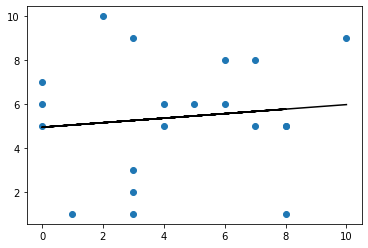

In [26]:
LinearReg(xarr,yarr,err_est='rsquare')

## Logistic Regression from scratch